In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Creating DataFrames to Use

In [2]:
training_data = pd.read_parquet("../Databases/cf_train.parquet/part-00003-f5f99d61-97a3-408a-9dcd-5d6fc378fff2-c000.snappy.parquet")

In [5]:
map_track_index_id = {}
for track_id_index,track_id in zip(training_data['track_id_index'],training_data['track_id']):
    map_track_index_id[track_id_index] = track_id

In [6]:
from pathlib import Path
import pandas as pd

data_dir = Path('../Databases/itemFactors_5_12_130am.parquet-20210512T212320Z-001/itemFactors_5_12_130am.parquet')
item_factors_df = pd.concat(
    pd.read_parquet(parquet_file)
    for parquet_file in data_dir.glob('*.parquet')
)

In [7]:
item_factors_df.head()

,id,features
0,0,"[-0.069474705, 0.4626529, -0.11687545, -0.7458..."
1,10,"[-0.19217631, 0.33361778, -0.6735579, -0.31199..."
2,20,"[-0.05328676, 0.44249037, -0.18045868, -0.1672..."
3,30,"[-0.15235876, 0.35179976, 0.64976025, -0.63035..."
4,40,"[-0.15211484, 0.38842732, -0.17080618, -0.2903..."


In [8]:
import sqlite3

# Create a SQL connection to our SQLite database
con = sqlite3.connect("../Databases/track_metadata.db")

metadata_df = pd.read_sql_query("SELECT * FROM songs", con)

In [9]:
item_factors_df['id'] = item_factors_df['id'].apply(lambda x: map_track_index_id[x])

In [3]:
df_embedded = pd.read_csv("UMAP_Embed_FULL_FINAL.csv")

### Creating Tags DataFrame

In [4]:
import sqlite3

# Create a SQL connection to our SQLite database
con_lastfm = sqlite3.connect("../Databases/lastfm_tags.db")

cur = con_lastfm.cursor()

# The result of a "cursor.execute" can be iterated over by row
for row in cur.execute('SELECT * FROM sqlite_master WHERE type="table";'):
    print(row)

cur.execute('SELECT * FROM sqlite_master WHERE type="table";').fetchall()

('table', 'tags', 'tags', 2, 'CREATE TABLE tags (tag TEXT)')
('table', 'tids', 'tids', 3, 'CREATE TABLE tids (tid TEXT)')
('table', 'tid_tag', 'tid_tag', 4, 'CREATE TABLE tid_tag (tid INT, tag INT, val FLOAT)')


[('table', 'tags', 'tags', 2, 'CREATE TABLE tags (tag TEXT)'),
 ('table', 'tids', 'tids', 3, 'CREATE TABLE tids (tid TEXT)'),
 ('table',
  'tid_tag',
  'tid_tag',
  4,
  'CREATE TABLE tid_tag (tid INT, tag INT, val FLOAT)')]

In [5]:
tid_df = pd.read_sql_query("SELECT * FROM tids;", con_lastfm)

In [6]:
tag_df = pd.read_sql_query("SELECT * FROM tags;", con_lastfm)

In [7]:
tid_tag_df = pd.read_sql_query("SELECT * FROM tid_tag;", con_lastfm)

In [8]:
map_idx_tid = {}
for i in range(len(tid_df)):
    map_idx_tid[i + 1] = tid_df['tid'][i]

In [9]:
map_idx_tag = {}
for i in range(len(tag_df)):
    map_idx_tag[i + 1] = tag_df['tag'][i]

In [10]:
tid_tag_df['tid'] = tid_tag_df['tid'].apply(lambda x: map_idx_tid[x])

In [11]:
tid_tag_df['tag'] = tid_tag_df['tag'].apply(lambda x: map_idx_tag[x])

In [12]:
tid_tag_count_df = pd.DataFrame(tid_tag_df['tag'].value_counts())

# Top 20 Most Frequent First

In [13]:
top_20_genres = list(tid_tag_count_df.index[:20])

In [14]:
tid_tag_top_20_df = tid_tag_df.loc[tid_tag_df['tag'].isin(top_20_genres)]

In [15]:
# tid_tag_top_20_group_tid_df = tid_tag_top_20_df.groupby(['tid'])['tag'].apply(','.join).reset_index()

In [16]:
tid_tag_top_20_group_FIRST_tid_df = tid_tag_top_20_df.groupby(['tid'])['tag'].first().reset_index()

In [17]:
tags_FIRST_20_item_factors_df = df_embedded.merge(tid_tag_top_20_group_FIRST_tid_df,how='inner',left_on=['tid'],right_on=['tid'])

<AxesSubplot:xlabel='X', ylabel='Y'>

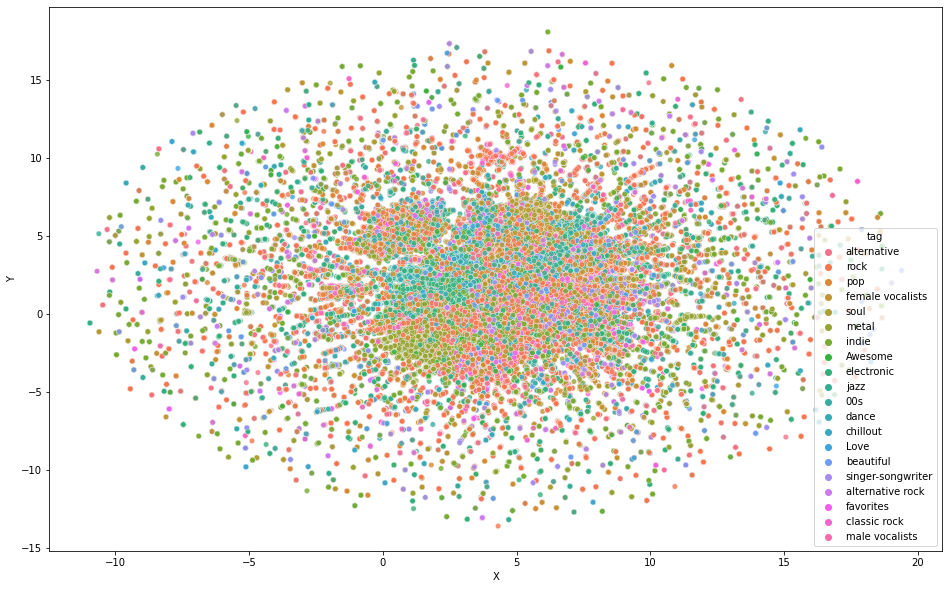

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(16,10))
sns.scatterplot(
    x="X", y="Y",
    hue="tag",
    data=tags_FIRST_20_item_factors_df,
    legend="full",
    alpha=0.8,
    s = 30
)

# Top 20 Most Frequent First

In [19]:
top_10_genres = list(tid_tag_count_df.index[:10])

In [20]:
tid_tag_top_10_df = tid_tag_df.loc[tid_tag_df['tag'].isin(top_10_genres)]

In [21]:
# tid_tag_top_20_group_tid_df = tid_tag_top_20_df.groupby(['tid'])['tag'].apply(','.join).reset_index()

In [22]:
tid_tag_top_10_group_FIRST_tid_df = tid_tag_top_10_df.groupby(['tid'])['tag'].first().reset_index()

In [23]:
tags_FIRST_10_item_factors_df = df_embedded.merge(tid_tag_top_10_group_FIRST_tid_df,how='inner',left_on=['tid'],right_on=['tid'])

<AxesSubplot:xlabel='X', ylabel='Y'>

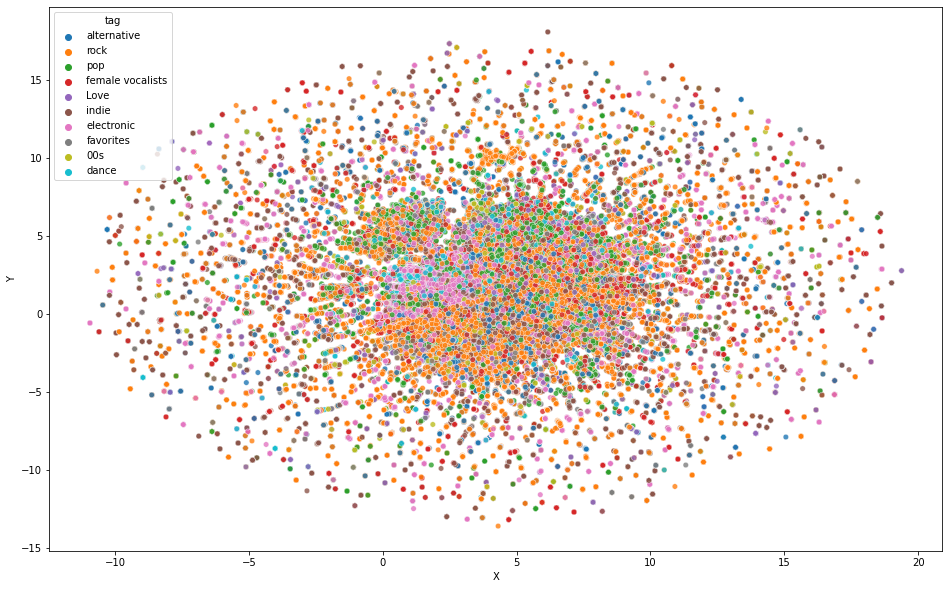

In [24]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(16,10))
sns.scatterplot(
    x="X", y="Y",
    hue="tag",
    data=tags_FIRST_10_item_factors_df,
    legend="full",
    alpha=0.8,
    s = 30
)

# Top 2 Most Frequent First

In [25]:
top_2_genres = list(tid_tag_count_df.index[:2])

In [26]:
tid_tag_top_2_df = tid_tag_df.loc[tid_tag_df['tag'].isin(top_2_genres)]

In [27]:
# tid_tag_top_20_group_tid_df = tid_tag_top_20_df.groupby(['tid'])['tag'].apply(','.join).reset_index()

In [28]:
tid_tag_top_2_group_FIRST_tid_df = tid_tag_top_2_df.groupby(['tid'])['tag'].first().reset_index()

In [29]:
tags_FIRST_2_item_factors_df = df_embedded.merge(tid_tag_top_2_group_FIRST_tid_df,how='inner',left_on=['tid'],right_on=['tid'])

<AxesSubplot:xlabel='X', ylabel='Y'>

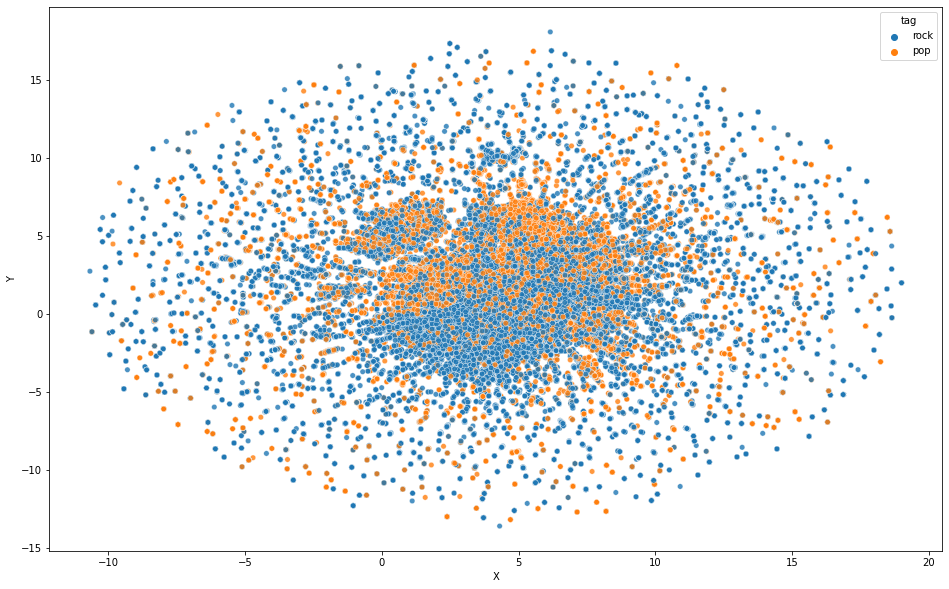

In [30]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(16,10))
sns.scatterplot(
    x="X", y="Y",
    hue="tag",
    data=tags_FIRST_2_item_factors_df,
    legend="full",
    alpha=0.8,
    s = 30
)

## Sample Tags


In [31]:
tags_Random_Sample = list(tid_tag_count_df[(tid_tag_count_df['tag']< 2500) & (tid_tag_count_df['tag']> 2490)].index)

In [32]:
tags_Random_Sample

['deep house', 'eurodance']

In [33]:
tid_tag_random_sample_df = tid_tag_df.loc[tid_tag_df['tag'].isin(tags_Random_Sample)]

In [34]:
tid_tag_Random_sample_group_FIRST_tid_df = tid_tag_random_sample_df.groupby(['tid'])['tag'].first().reset_index()

In [35]:
tags_FIRST_Random_sample_item_factors_df = df_embedded.merge(tid_tag_Random_sample_group_FIRST_tid_df,how='inner',left_on=['tid'],right_on=['tid'])

<AxesSubplot:xlabel='X', ylabel='Y'>

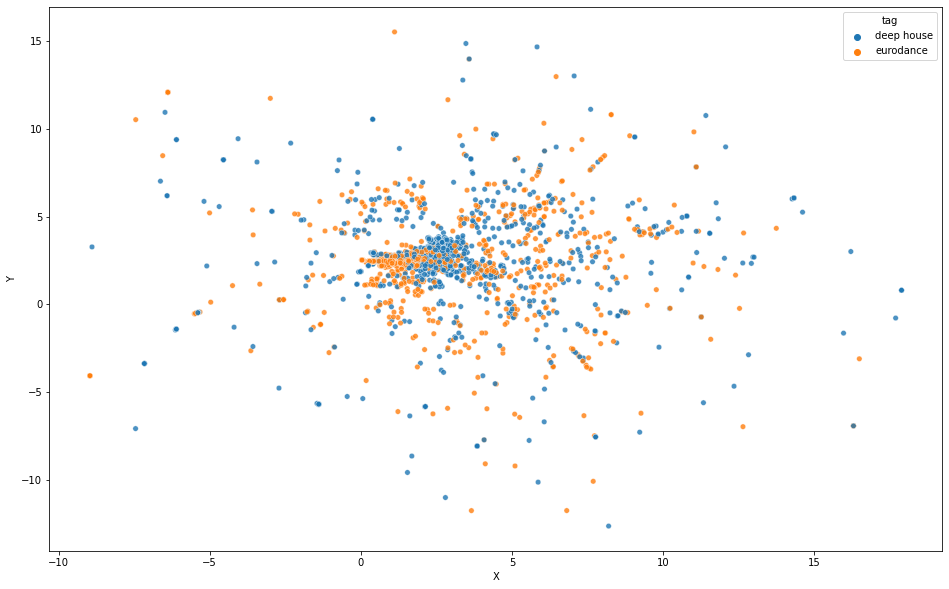

In [36]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(16,10))
sns.scatterplot(
    x="X", y="Y",
    hue="tag",
    data=tags_FIRST_Random_sample_item_factors_df,
    legend="full",
    alpha=0.8,
    s = 30
)

In [37]:
any(tid_tag_df['tag'] == 'death metal')

True

In [38]:
any(tid_tag_df['tag'] == 'christian')

True

## Sample Tags Pick 2


In [48]:
tags_Random_Sample = list(tid_tag_count_df[(tid_tag_count_df['tag']< 2500) & (tid_tag_count_df['tag']> 2490)].index)

In [49]:
tags_Random_Sample

['deep house', 'eurodance']

In [39]:
tid_tag_random_sample_df = tid_tag_df.loc[(tid_tag_df['tag']== 'punk rock') |(tid_tag_df['tag']== 'choir')]

In [40]:
tid_tag_Random_sample_group_FIRST_tid_df = tid_tag_random_sample_df.groupby(['tid'])['tag'].first().reset_index()

In [41]:
tags_FIRST_Random_sample_item_factors_df = df_embedded.merge(tid_tag_Random_sample_group_FIRST_tid_df,how='inner',left_on=['tid'],right_on=['tid'])

<AxesSubplot:xlabel='X', ylabel='Y'>

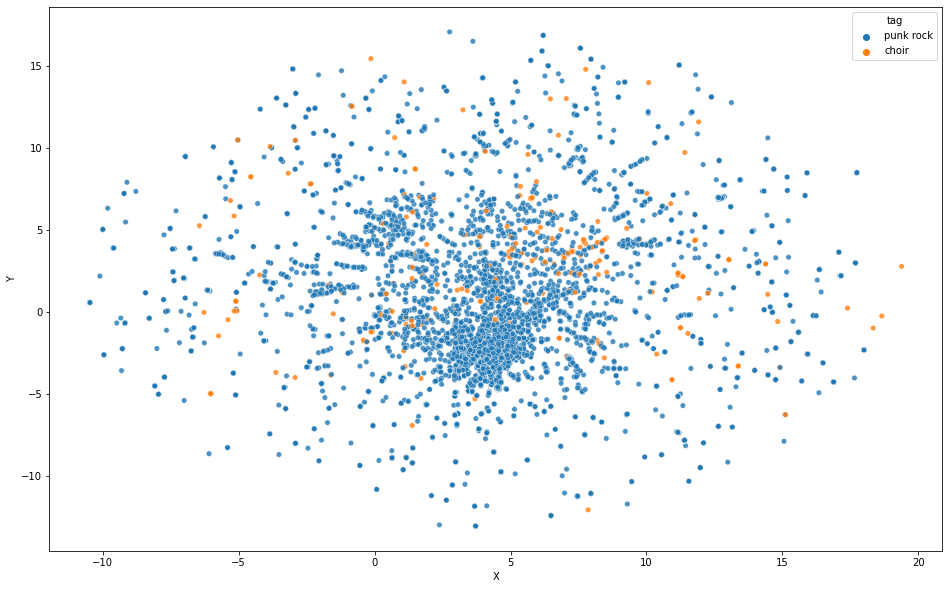

In [42]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(16,10))
sns.scatterplot(
    x="X", y="Y",
    hue="tag",
    data=tags_FIRST_Random_sample_item_factors_df,
    legend="full",
    alpha=0.8,
    s = 30
)